In [1]:
import math;
import numpy as np;

paramPlaneList = [];
originList = [];
#number of surfaces
noOfParamPlanes = 40; # number of rectangles which make a cylinder
radius = 0.015;

height = 0.01; # this needs to be consistant with the input file
theta = 0.0;
delt = 2.0*math.pi/noOfParamPlanes; # 2*pi/# of rectangles

offset = [0.02,0.02,0.0]; # in centimeter; in cgs; if wanted to switch to SI, change the value of k_B in input file

#making a cylinder out of 40 rectangles
for ii in range(noOfParamPlanes):
    #define parametric surface
    x0=math.cos(ii*delt)*radius+offset[0]; # origin of vector
    y0=math.sin(ii*delt)*radius+offset[1];
    z0 = 0.0; 
    
    x1=math.cos((ii+1)*delt)*radius+offset[0];
    y1=math.sin((ii+1)*delt)*radius+offset[1];
    z1=0.0;
    
    #tangent and parameter 1
    # utop and vtop tell the span of these two vectors to form a plane
    uTop = np.linalg.norm([x1-x0,y1-y0,z1-z0],2) # difference between x and y projections
    u=[x1-x0,y1-y0,z1-z0]/uTop; # normalize
    ux=u[0]; uy=u[1]; uz=u[2]; # vector tangential to cylinder surface and in the xy plane
    
    #tangent and parameter 2
    vx=0.0; vy=0.0; vz=1.0; # vector tangential to cylinder surface and in the z direction
    vTop = height;
    
    #surface normals
    xt=math.cos((ii+0.5)*delt)*radius+offset[0];
    yt=math.sin((ii+0.5)*delt)*radius+offset[1];
    zt=height/2;
    ln=[offset[0]-xt,offset[1]-yt,height/2-zt]/np.linalg.norm([offset[0]-xt,offset[1]-yt,height/2-zt],2);
    lnx=ln[0]; lny=ln[1]; lnz=ln[2];
    rnx=-lnx; rny=-lny; rnz=-lnz;
    # vector normal to the rectangle segment; right and left are pointing to different directions as of the surface
    # rn = [math.cos((ii+0.5)*delt)*radius, math.sin((ii+0.5)*delt)*radius, 0]/np.linalg.norm([math.cos((ii+0.5)*delt)*radius, math.sin((ii+0.5)*delt)*radius, 0],2);
    
    #porosity, specularity, temperature, momentum conservation (left and right)
    # porosity = 0: particles bounces back from surface; porosity = 1: particles completely go through the surface
    # specularity play the same role as alpha in the Nat. Comm. paper. specularity = 1: completely specular reflection. specularity = 0: completely diffusive reflection
    # temperature: plugged into the Boltzman-Einstein distribution for random particle velocity
    # momentum conservation: for gas only, not used in phonon case, just keep them 1.0
    pl=0.0; sl=1.0; tl=273.0;cl=1.0;
    pr=0.0; sr=1.0; tr=273.0;cr=1.0;
    
    #periodic
    p=0.0;
    
    # since the cylinder segments are not source, these are set to be ineffective
    # 2 species of particles for now; can change freely
    #density if a source, for each species (left and right)
    nr0=0.0; nr1=0.0;nl0=0.0;nl1=0.0;
    #source
    sourcer=0.0;sourcel=0.0;
    #area (only used if a source)
    a=0.0;
    #sink
    sinkl=0.0;
    sinkr=0.0;
    
    #code expects it in this order:
    paramPlane=[x0,y0,z0,ux,uy,uz,vx,vy,vz,uTop,vTop,rnx,rny,rnz,lnx,lny,lnz,pr,sr,tr,nr0,nr1,sourcer,sinkr,cr,pl,sl,tl,nl0,nl1,sourcel,sinkl,cl,p,a];
    
    paramPlaneList.append(paramPlane);
    

#rectangle to act as source:

x0=0.035;
y0=0.035;
z0 = height - 0.0000000001; 

x1=0.045;
y1=0.035;
z1= height - 0.0000000001; 

x2=0.035;
y2=0.045;
z2= height - 0.0000000001; 

#tangent and parameter 1
uTop = np.linalg.norm([x1-x0,y1-y0,z1-z0],2)
u=[x1-x0,y1-y0,z1-z0]/uTop;
ux=u[0]; uy=u[1]; uz=u[2];

#tangent and parameter 2
vTop = np.linalg.norm([x2-x0,y2-y0,z2-z0],2)
v=[x2-x0,y2-y0,z2-z0]/vTop;
vx=v[0]; vy=v[1]; vz=u[2];

#surface normals

ln=[0.0,0.0,-1.0];
lnx=ln[0]; lny=ln[1]; lnz=ln[2];
rnx=-lnx; rny=-lny; rnz=-lnz;

#porosity, specularity, temperature, momentum conservation (left and right)
pl=0.0; sl=1.0; tl=273.0;cl=1.0;
pr=0.0; sr=1.0; tr=273.0;cr=1.0;

#periodic
p=0.0;

#density if a source, for each species (left and right)
nr0=0.0; nr1=0.0;nl0=0.0;nl1=10.0e9;
#source
sourcer=0.0;sourcel=1.0;
#area (only used if a source)
a=0.01*0.01;
#sink
sinkl=0.0;
sinkr=0.0;

#code expects it in this order:
paramPlane=[x0,y0,z0,ux,uy,uz,vx,vy,vz,uTop,vTop,rnx,rny,rnz,lnx,lny,lnz,pr,sr,tr,nr0,nr1,sourcer,sinkr,cr,pl,sl,tl,nl0,nl1,sourcel,sinkl,cl,p,a];

paramPlaneList.append(paramPlane);

# particles dissapear when hitting a sink
#rectangle to act as sink:

x0=0.035;
y0=0.035;
z0 = 0.0000000001; 

x1=0.045;
y1=0.035;
z1= 0.0000000001; 

x2=0.035;
y2=0.045;
z2= 0.0000000001; 

#tangent and parameter 1
uTop = np.linalg.norm([x1-x0,y1-y0,z1-z0],2)
u=[x1-x0,y1-y0,z1-z0]/uTop;
ux=u[0]; uy=u[1]; uz=u[2];

#tangent and parameter 2
vTop = np.linalg.norm([x2-x0,y2-y0,z2-z0],2)
v=[x2-x0,y2-y0,z2-z0]/vTop;
vx=v[0]; vy=v[1]; vz=u[2];

#surface normals

ln=[0.0,0.0,-1.0];
lnx=ln[0]; lny=ln[1]; lnz=ln[2];
rnx=-lnx; rny=-lny; rnz=-lnz;

#porosity, specularity, temperature, momentum conservation (left and right)
pl=0.0; sl=1.0; tl=273.0;cl=1.0;
pr=0.0; sr=1.0; tr=273.0;cr=1.0;

#periodic
p=0.0;

#density if a source, for each species (left and right)
nr0=0.0; nr1=0.0;nl0=0.0;nl1=0.0;
#source
sourcer=0.0;sourcel=0.0;
#area (only used if a source)
a=0.01*0.01;
#sink
sinkl=0.0;
sinkr=1.0;

#code expects it in this order:
paramPlane=[x0,y0,z0,ux,uy,uz,vx,vy,vz,uTop,vTop,rnx,rny,rnz,lnx,lny,lnz,pr,sr,tr,nr0,nr1,sourcer,sinkr,cr,pl,sl,tl,nl0,nl1,sourcel,sinkl,cl,p,a];

paramPlaneList.append(paramPlane);

paramPlaneList[0]

[0.035,
 0.02,
 0.0,
 -0.07845909572784468,
 0.996917333733128,
 0.0,
 0.0,
 0.0,
 1.0,
 0.002353772871835348,
 0.01,
 0.996917333733128,
 0.07845909572784504,
 -0.0,
 -0.996917333733128,
 -0.07845909572784504,
 0.0,
 0.0,
 1.0,
 273.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 273.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0]

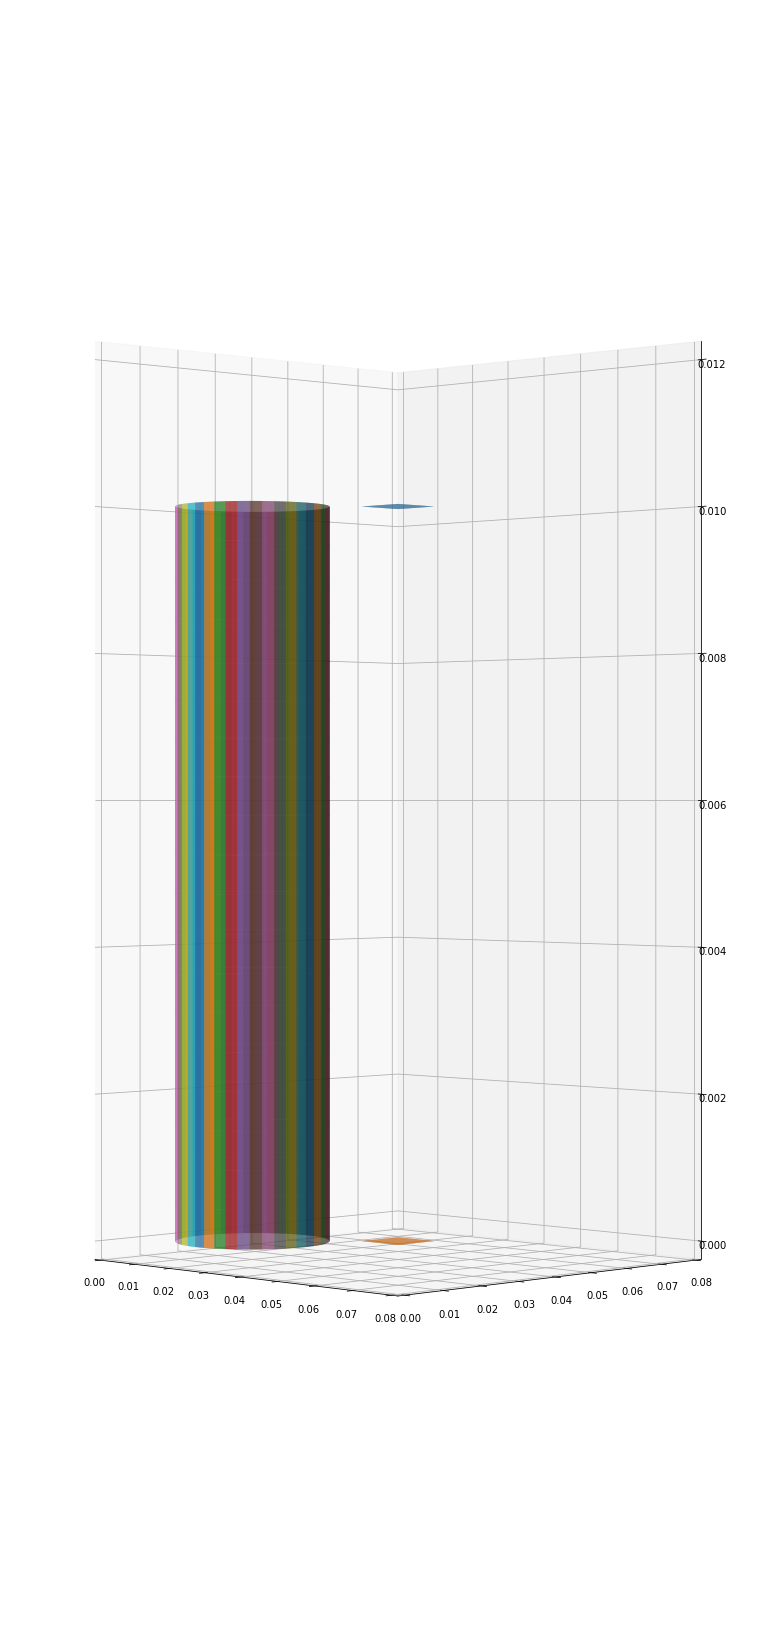

In [2]:
#Plot surfaces

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
n = 20

fig = plt.figure();
fig.set_size_inches(30, 30)
ax = fig.add_subplot(121, projection='3d');
ax.set_zlim(0,0.012);
ax.set_xlim(0,0.08);
ax.set_ylim(0,0.08);
ax.view_init(36, 26);

totalPlanes = len(paramPlaneList);

for ii in range(totalPlanes):
    u = np.linspace(0, paramPlaneList[ii][9], n) # utop, norm of section length
    v = np.linspace(0, paramPlaneList[ii][10], n) # vtop
    u, v = np.meshgrid(u, v)

    x = paramPlaneList[ii][0] + paramPlaneList[ii][3]*u + paramPlaneList[ii][6]*v; # x0, ux, vx
    y = paramPlaneList[ii][1] + paramPlaneList[ii][4]*u + paramPlaneList[ii][7]*v; # y0, uy, vy
    z = paramPlaneList[ii][2] + paramPlaneList[ii][5]*u + paramPlaneList[ii][8]*v; # z0, uz, vz
    
    surf = ax.plot_surface(x,y,z)

ax.view_init(0, -45)
plt.show()


In [3]:
#write surfaces to file
import os
if os.path.isfile("paramplanes.dat"):
    os.remove("paramplanes.dat");

totalPlanes = len(paramPlaneList);

f = open('paramplanes.dat','a');
f.write('{}'.format(totalPlanes));
f.write('\n');

kk=0;

for ii in range(totalPlanes):
    totalElements = len(paramPlaneList[ii])
    for jj in range(totalElements):
        kk = kk+1;
        f.write('{}'.format(paramPlaneList[ii][jj]));
        f.write('\n');
        
f.close()

In [4]:
#generate particles. The number of particles here must be consistent with the input file
n=100;
particleList = [];
for ii in range(n):
    coords = [0.04,0.04,0.005];
    particleList.append(coords);
    
    

In [5]:
#write particles to file

import os
if os.path.isfile("particles.dat"):
    os.remove("particles.dat");

totalParticles = len(particleList);

f = open('particles2.dat','a');

for ii in range(totalParticles):
    
    f.write('{}'.format(particleList[ii][0]));
    f.write('\t');
    f.write('{}'.format(particleList[ii][1]));
    f.write('\t');
    f.write('{}'.format(particleList[ii][2]));
    f.write('\n');
        
f.close()